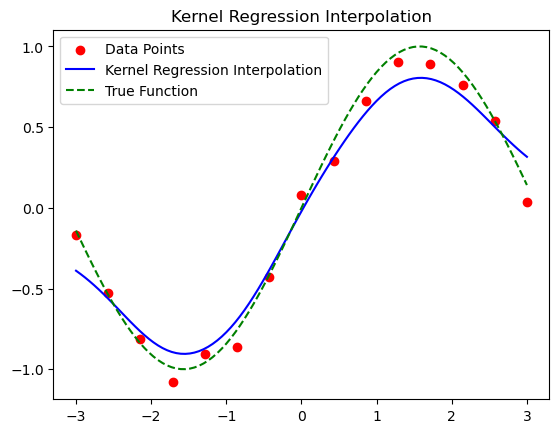

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组离散的观测数据
np.random.seed(41)
X = np.linspace(-3, 3, 15)  # 观测点
y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape)  # 真实函数带噪声

def gaussian_kernel(x, xi, h):
    """ 高斯核函数 """
    return np.exp(-((x - xi) ** 2) / (2 * h ** 2))

def kernel_regression(x_query, X, y, h):
    """ 核回归插值 """
    weights = np.array([gaussian_kernel(x_query, xi, h) for xi in X])  # 计算权重
    weights /= np.sum(weights)  # 归一化
    return np.sum(weights * y)  # 计算加权和

# 计算插值
h = 0.5  # 选择合适的带宽
X_interp = np.linspace(-3, 3, 100)  # 插值点
y_interp = np.array([kernel_regression(x, X, y, h) for x in X_interp])  # 计算插值值

plt.scatter(X, y, color='red', label="Data Points")  # 观测点
plt.plot(X_interp, y_interp, label="Kernel Regression Interpolation", color='blue')  # 插值结果
plt.plot(X_interp, np.sin(X_interp), '--', label="True Function", color='green')  # 真实函数
plt.legend()
plt.title("Kernel Regression Interpolation")
plt.show()